## **Воркшоп по API**

### **Работа с ТВ-шоу через REST API**

https://api.tvmaze.com - публичный API с данными о ТВ-шоу, сериалах и актерах

#### **Задание № 1**

С помощью TVMaze API выгрузите данные о всех имеющихся шоу со страницы с индексом 0. Постройте гистограмму, показывающую распределение шоу по годам премьеры. Проанализируйте гистограмму и сделайте выводы.

In [1]:
# подключаем необходимые библиотеки
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# URL для получения данных о всех ТВ-шоу со страницы с индексом 0
url = "https://api.tvmaze.com/shows?page=0"

In [3]:
# отправляем GET-запрос и получаем ответ в формате JSON
response = requests.get(url)
data = response.json()
# преобразуем JSON в список
shows_list = list(data)

In [4]:
# выводим на экран названия всех шоу
print("Названия всех шоу:")
for show in shows_list:
    print(show['name'])

Названия всех шоу:
Under the Dome
Person of Interest
Bitten
Arrow
True Detective
The 100
Homeland
Glee
Revenge
Grimm
Gotham
Lost Girl
The Flash
Continuum
Constantine
Penny Dreadful
The Amazing Race
Supernatural
The Strain
The Last Ship
True Blood
Once Upon a Time in Wonderland
Hawaii Five-0
Hellsing
Hellsing Ultimate
Berserk
Californication
Vikings
American Horror Story
Marvel's Agents of S.H.I.E.L.D.
Fargo
Hemlock Grove
Helix
The Killing
Intruders
Z Nation
Resurrection
Death Note
Last Man Standing
Sleepy Hollow
Outlander
Scorpion
NCIS: New Orleans
Forever
Witches of East End
Madam Secretary
Brooklyn Nine-Nine
The Lottery
The Knick
How to Get Away with Murder
Nashville
Legends
Red Band Society
Chicago P.D.
black-ish
New Girl
Chicago Fire
NCIS
Orphan Black
The Originals
The Vampire Diaries
Utopia
Bones
The Big Bang Theory
Grey's Anatomy
Castle
The Blacklist
The Voice
Dancing with the Stars
NCIS: Los Angeles
The Walking Dead
Hell on Wheels
The Mindy Project
Sons of Anarchy
The Middle
The

In [5]:
# создаем DataFrame на основании полученного списка
df = pd.DataFrame(shows_list)

In [6]:
# выводим общую информацию о датафрейме
print("Информация о DataFrame:")
print(df.info())

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              240 non-null    int64  
 1   url             240 non-null    object 
 2   name            240 non-null    object 
 3   type            240 non-null    object 
 4   language        240 non-null    object 
 5   genres          240 non-null    object 
 6   status          240 non-null    object 
 7   runtime         229 non-null    float64
 8   averageRuntime  240 non-null    int64  
 9   premiered       240 non-null    object 
 10  ended           218 non-null    object 
 11  officialSite    167 non-null    object 
 12  schedule        240 non-null    object 
 13  rating          240 non-null    object 
 14  weight          240 non-null    int64  
 15  network         229 non-null    object 
 16  webChannel      14 non-null     object 
 17  dvdCountry 

In [7]:
# создаем серию с годами выхода всех шоу
df['premiere_year'] = pd.to_datetime(df['premiered'], errors='coerce').dt.year

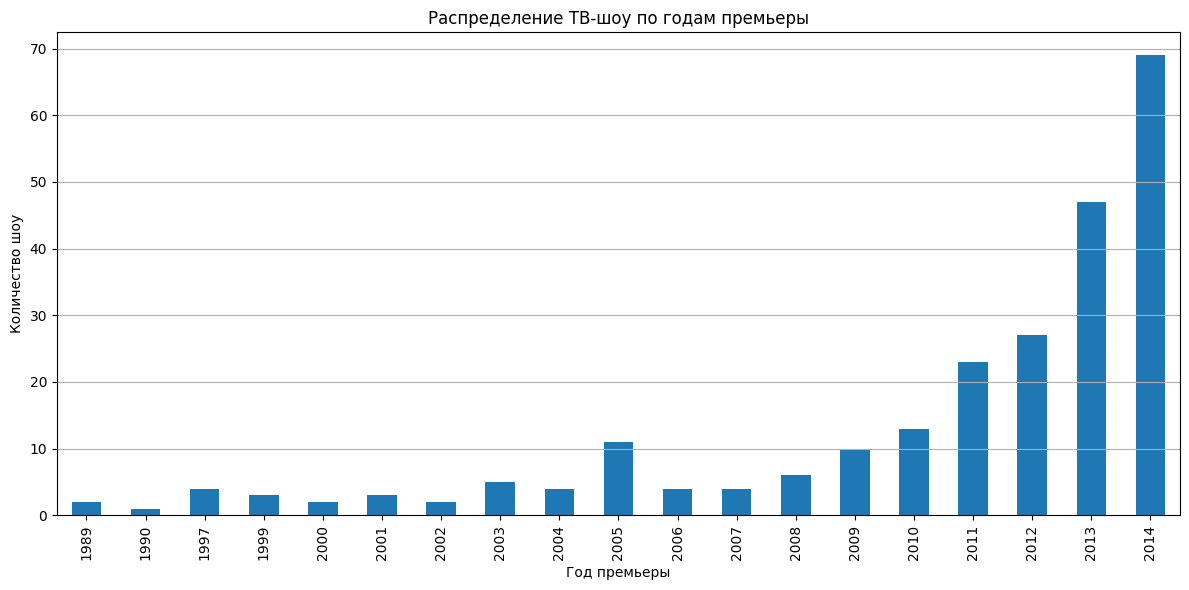

In [8]:
# строим гистограмму с распределением шоу по годам премьеры
plt.figure(figsize=(12, 6))
df['premiere_year'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
plt.title('Распределение ТВ-шоу по годам премьеры')
plt.xlabel('Год премьеры')
plt.ylabel('Количество шоу')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Выводы по графику**:

#### **Задание № 2**

С помощью TVMaze API выгрузите все данные о шоу, где в названии есть слово "друзья" (friends). На основании полученных данных постройте Sunburst-диаграмму с иерархией Язык → Жанр → Название.

In [9]:
# подключаем Plotly для построения Sunburst-диаграммы
import requests
import pandas as pd
import plotly.express as px

In [10]:
# URL для получения списка ТВ-шоу, где в названии есть слово "друзья (friends)"
url = "https://api.tvmaze.com/search/shows?q=friends"

In [11]:
# отправляем GET-запрос и получаем ответ в формате JSON
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"Ошибка при запросе: {response.status_code}")

data = response.json()
# преобразуем JSON в список
shows_list = list(data)

In [12]:
# выводим на экран количество выгруженных шоу
print(f"Количество шоу с 'friends' в названии: {len(shows_list)}")

Количество шоу с 'friends' в названии: 10


In [13]:
# создаем список с данными по каждому шоу
shows_data = []
for item in shows_list:
    show = item.get('show', {})
    name = show.get('name', 'Unknown')
    language = show.get('language', 'Unknown')
    genres = show.get('genres', [])

    # пропускаем шоу без жанров
    # иначе будет ошибка
    if not genres:
        continue

    for genre in genres:  # добавим одну строку на каждый жанр
        shows_data.append({
            'name': name,
            'language': language,
            'genre': genre
        })


In [14]:
# формируем DataFrame на основании списка с данными по каждому шоу
df = pd.DataFrame(shows_data)

In [15]:
# строим Sunbursts-диаграмму
fig = px.sunburst(
    df,
    path=['language', 'genre', 'name'],
    title='Sunburst-диаграмма: Язык → Жанр → Название шоу ("Friends")',
    width=800,
    height=600
)
fig.show()

#### **Задание № 3**

С помощью TVMaze API выгрузите данные о всех эпизодах сериала "Сверхъестественное", который выходил с 2005 по 2020 гг. Найдите серии с минимальным и максимальным средними рейтингами, а также постройте столбчатую диаграмму со средними рейтингами каждого сезона. Проанализируйте полученный график и сделайте выводы.

In [16]:
# URL для получения списка ТВ-шоу, где в названии есть слово "сверхъестественное (supernatural)"
import requests
import pandas as pd
import matplotlib.pyplot as plt
search_url = "https://api.tvmaze.com/search/shows?q=supernatural"

In [17]:
# отправляем GET-запрос и получаем ответ в формате JSON
search_response = requests.get(search_url)
if search_response.status_code != 200:
    raise Exception(f"Ошибка при запросе: {search_response.status_code}")

search_data = search_response.json()
# преобразуем JSON в список
search_results = list(search_data)

In [18]:
# сохраняем id сериала "Сверхъестественное"
supernatural_id = None
for item in search_results:
    show = item.get('show', {})
    if show.get('name', '').lower() == 'supernatural' and '2005' in str(show.get('premiered', '')):
        supernatural_id = show['id']
        break

if supernatural_id is None:
    raise Exception("Сериал 'Сверхъестественное' не найден")

In [19]:
# URL для получения списка эпизодов сериала "Сверхъестественное"
episodes_url = f"https://api.tvmaze.com/shows/{supernatural_id}/episodes"

In [20]:
# отправляем GET-запрос и получаем ответ в формате JSON
episodes_response = requests.get(episodes_url)
if episodes_response.status_code != 200:
    raise Exception(f"Ошибка при получении эпизодов: {episodes_response.status_code}")

episodes_data = episodes_response.json()
# преобразуем JSON в список


In [21]:
# формируем DataFrame на основании списка с данными по каждой серии
episodes_df = pd.DataFrame(episodes_data)

In [22]:
# отфильтровываем только нужные столбцы
episodes_df = episodes_df[['season', 'number', 'name', 'airdate', 'rating']]
episodes_df['average'] = episodes_df['rating'].apply(lambda r: r['average'] if isinstance(r, dict) else None)

# находим данные о серии с минимальным рейтингом
min_rating_episode = episodes_df.loc[episodes_df['average'].idxmin()]
print("Серия с минимальным рейтингом:")
print(min_rating_episode)


Серия с минимальным рейтингом:
season                   10
number                    4
name             Paper Moon
airdate          2014-10-28
rating     {'average': 6.3}
average                 6.3
Name: 198, dtype: object


<ipython-input-22-02a8e97f3a75>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
# находим данные о серии с максимальным рейтингом
max_rating_episode = episodes_df.loc[episodes_df['average'].idxmax()]
print("Серия с максимальным рейтингом:")
print(max_rating_episode)

Серия с максимальным рейтингом:
season                             2
number                            22
name       All Hell Breaks Loose (2)
airdate                   2007-05-17
rating              {'average': 9.3}
average                          9.3
Name: 43, dtype: object


In [24]:
# группируем данные и вычисляем средний рейтинг для каждого сезона
season_ratings = episodes_df.groupby('season')['average'].mean().reset_index()

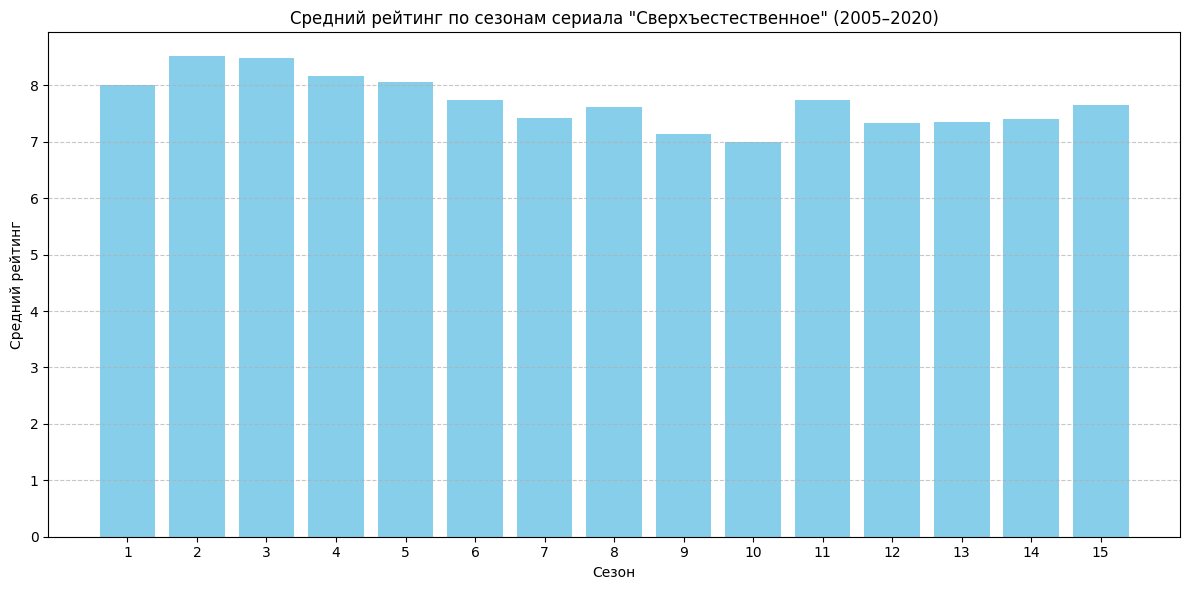

In [25]:
# строим столбчатую диаграмму рейтинга сезонов сериала "Сверхъестественное"
plt.figure(figsize=(12, 6))
plt.bar(season_ratings['season'], season_ratings['average'], color='skyblue')
plt.xlabel('Сезон')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг по сезонам сериала "Сверхъестественное" (2005–2020)')
plt.xticks(season_ratings['season'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Выводы по графику**:

### **Работа с GitHub API через GraphQL**

https://api.github.com/graphql - базовый адрес для GraphQL-запросов к GitHub

https://docs.github.com/ru/graphql - документация GitHub GraphQL API

#### **Задание 4**

С помощью GitHub API через GraphQL выгрузите данные о следующих репозиториях:
Автор | Название репозитория
------|---------------------
pallets | flask
django | django
numpy | numpy
pandas-dev | pandas
tiangolo | fastapi

На основании выгруженных данных постройте столбчатую диаграмму, отображающую количество звезд для указанных репозиториев.

In [ ]:
# подключаем необходимые библиотеки
import requests
import pandas as pd
import matplotlib.pyplot as plt

# персональный токен GitHub
GITHUB_TOKEN = "token here"

In [27]:
# базовый адрес для GraphQL-запросов к GitHub
GITHUB_API_URL = "https://api.github.com/graphql"

**Bearer** - это тип токена, который указывает, что доступ к ресурсу предоставляется по персональному токеном. Является обязательным механизмом при работе с GitHub API через GraphQL.

In [28]:
# заголовки запроса
headers = {
    "Authorization": f"Bearer {GITHUB_TOKEN}",
    "Content-Type": "application/json"
}

In [29]:
# список кортежей (владелец, имя репозитория), для которых нужно получить число звезд
repos = [
    ("pallets", "flask"),
    ("django", "django"),
    ("numpy", "numpy"),
    ("pandas-dev", "pandas"),
    ("tiangolo", "fastapi")
]

In [30]:
# шаблон запроса GraphQL, в который подставляются owner (владелец) и name (название) каждого репозитория
query_template = """
query {{
  repository(owner: \"{owner}\", name: \"{name}\") {{
    name
    owner {{ login }}
    stargazerCount
  }}
}}
"""

In [31]:
data = []
for owner, name in repos:
    query = query_template.format(owner=owner, name=name)
    response = requests.post(GITHUB_API_URL, headers=headers, json={"query": query})
    if response.status_code != 200:
        raise Exception(f"Ошибка при запросе к GitHub API: {response.status_code}")
    result = response.json()
    repo_info = result['data']['repository']
    data.append({
        "owner": repo_info['owner']['login'],
        "repository": repo_info['name'],
        "stars": repo_info['stargazerCount']
    })


In [32]:
# формируем DataFrame на основании списка с данными о репозиториях
df = pd.DataFrame(data)

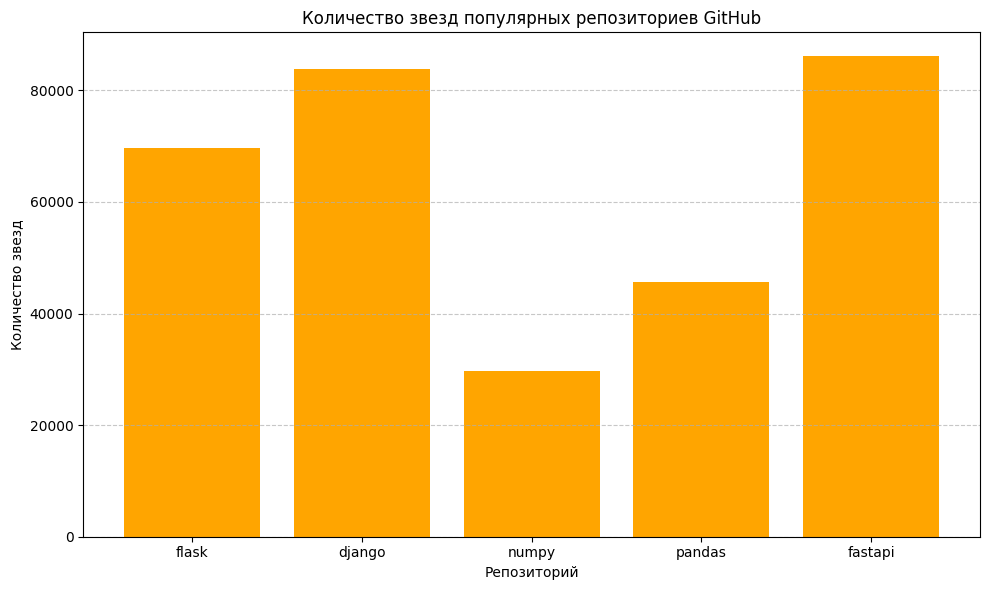

In [34]:
# строим столбчатую диаграмму для отображения количества звезд популярных репозиториев GitHub
plt.figure(figsize=(10, 6))
plt.bar(df['repository'], df['stars'], color='orange')
plt.xlabel('Репозиторий')
plt.ylabel('Количество звезд')
plt.title('Количество звезд популярных репозиториев GitHub')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **Задание № 5**

С помощью GitHub API через GraphQL для репозитория vscode (автор microsoft) выгрузите последние 100 опубликованных issues. Постройте линейный график, отображающий количества созданных issues по часам. Проанализируйте полученный график и сделайте выводы.

**issues** - встроенная система обсуждений, задач и отслеживания ошибок в репозиториях GitHub

In [ ]:
# подключаем необходимые библиотеки
import requests
import pandas as pd
import matplotlib.pyplot as plt

# персональный токен GitHub
GITHUB_TOKEN = "token here"
# базовый адрес для GraphQL-запросов к GitHub
GITHUB_API_URL = "https://api.github.com/graphql"

# заголовки запроса
headers = {
    "Authorization": f"Bearer {GITHUB_TOKEN}",
    "Content-Type": "application/json"
}
# запрос на получение последних 100 issues из репозитория vscode, которым владеет microsoft
query = """
query {
  repository(owner: \"microsoft\", name: \"vscode\") {
    issues(last: 100, states: OPEN) {
      nodes {
        title
        createdAt
      }
    }
  }
}
"""

In [36]:
# отправляем POST-запрос
response = requests.post(GITHUB_API_URL, headers=headers, json={"query": query})
if response.status_code != 200:
    raise Exception(f"Ошибка при запросе к GitHub API: {response.status_code}")
# извлекаем из полученного ответа информацию о созданных issues
issues = response.json()['data']['repository']['issues']['nodes']

In [37]:
# преобразуем полученный список в датафрейм
df = pd.DataFrame(issues)


In [38]:
# преобразуем столбец createdAt в формат datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])

# создаем столбец с часами, округляя вниз
df['hour'] = df['createdAt'].dt.floor('h')

In [39]:
# группируем данные и подсчитываем количество issues для каждого часа
issues_per_hour = df.groupby('hour').size().reset_index(name='count')

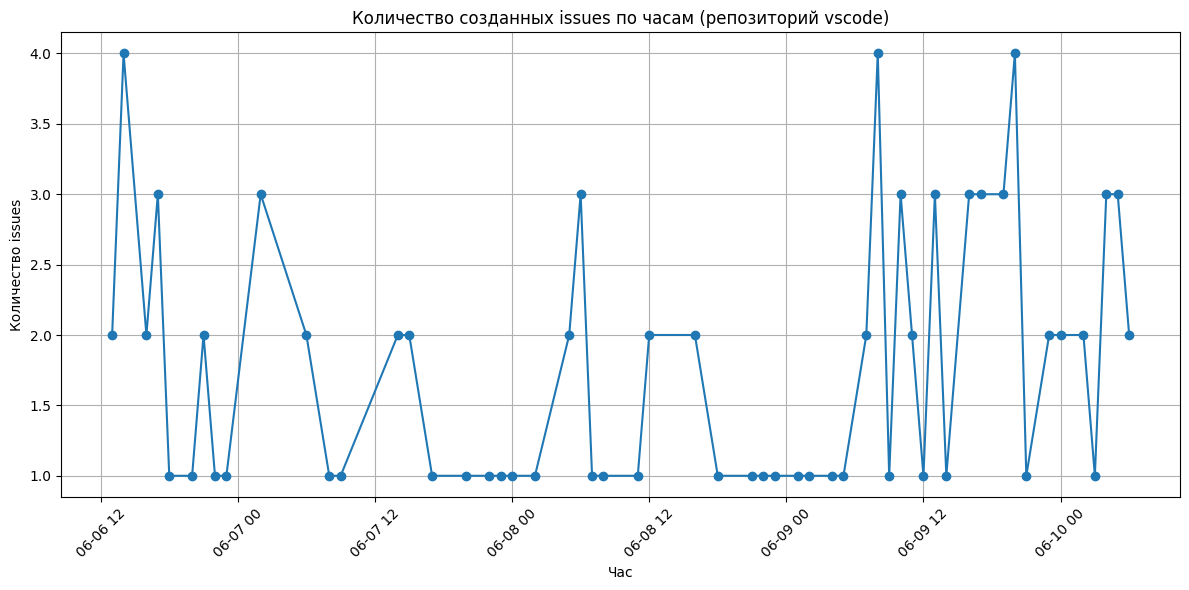

In [40]:
# строим линейный график для отображения количества созданных issues по часам в репозитории vscode
plt.figure(figsize=(12, 6))
plt.plot(issues_per_hour['hour'], issues_per_hour['count'], marker='o', linestyle='-')
plt.xlabel('Час')
plt.ylabel('Количество issues')
plt.title('Количество созданных issues по часам (репозиторий vscode)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Выводы по графику**: